# Identificación, tratamiento y manejo de Valores faltantes o Missing Values
<img width = 80%; src="https://upload.wikimedia.org/wikipedia/commons/c/ce/Puzzle_black-white_missing.jpg">

## En este notebook aprenderás a:
<div style="background-color: rgb(0, 143, 88);margin: 20px; padding: 20px; border-left: 9px solid #ffb200;">
<ul style="color: rgb(255, 255, 255);font-weight:bold;font-size:15px;">
    <li style="padding:10px;">Leer un DataFrame con missing values </li>
    <li style="padding:10px;">Inspeccionar un conjunto de datos en busca de Missing values</li>
    <li style="padding:10px;">Visualizar los missing values</li>
    <li style="padding:10px;">Construir tu función para visualizar el porcentaje de Missing Values a lo largo de una fila</li>
    <li style="padding:10px;">Manejar los missing values de forma aislada</li>
    <li style="padding:10px;">Manejar los missing values teniendo en cuenta el contexto que los rodea</li>
</ul>
</div>

## Antes de empezar

En este notebook se han utilizado los siguientes paquetes que puedes instalar utilizando las líneas de código anexas en la siguiente celda:
- pandas
- numpy
- missingno


In [46]:
# !pip install pandas --user
# !pip install numpy --user
# !pip install scikit-learn --user
# !pip install missingno --user

# Ejemplo 1

## Leyendo el DataFrame

Comentábamos en la parte de teoría que en ocasiones los Missing Values nos pueden venir dados como:
- Un valor ausente en la tabla
- Un valor por defecto que quiere indicar Missing Value

🎁 Te dejo por aquí una lista de valores frequentes *(treat_NaNs)* que por defecto podrían representar valores faltantes

Si leemos la primera hoja de cálculo del archivo excel con nombre "dataset_notebook_demo.xlsx" sin utilizar esa lista observa lo que sucede:

In [47]:
import pandas as pd
ruta_dataset = "dataset_notebook_demo.xlsx"
df= pd.read_excel(ruta_dataset)
df

,Año,Género,Número Ventas
0,2014,Aventuras,400.0
1,-,Bélico,80.0
2,-,Biografías,200.0
3,-,Novela Romántica,350.0
4,-,Poesía,80.0
5,2015,Aventuras,500.0
6,-,Bélico,150.0
7,-,Biografías,200.0
8,-,Novela Romántica,300.0
9,-,Poesía,120.0


Tenemos un valor "-" que representa un valor faltante, pero no se detecta como tal si no como un caracter.

Si ahora por el contrario, empleamos la lista que te comentaba para que reconozca ese caracter como un valor faltante:

In [48]:
treat_NaNs = [" ","",".","-","._",",",";",":","''","'","/","?","!","[]","#",
"´","&","$","()","{}","ç","Ç","`","^","*","+","|","%","n/a","N/A","--","NA","na"]

ruta_dataset = "dataset_notebook_demo.xlsx"
df = pd.read_excel(ruta_dataset, na_values=treat_NaNs)
df_test = df

In [49]:
df.head()

,Año,Género,Número Ventas
0,2014.0,Aventuras,400.0
1,NaN,Bélico,80.0
2,NaN,Biografías,200.0
3,NaN,Novela Romántica,350.0
4,NaN,Poesía,80.0


comprobamos como ahora el caracter "-" es reconocido como un valor NaN

## Describiendo el DataFrame
Uno de los primeros pasos cuando llega a nuestras manos un set de datos es **explorarlo**.

Y digo uno de los primeros porque el más importante es conseguir abrir el archivo. Ese aspecto daría para
otra tarea completa dedicada a a la correcta conexión y lectura de información proveniente de diferentes orígenes de datos.

No obstante, para poder empezar a trabajar con un conjunto de datos cualesquiera es importante **analizarlos previamente**.

Los pasos más habituales suelen ser:
- Ver las primeras y últimas filas de nuestro DataFrame
- Intentar realizar una descripción rápida
- Ver valores únicos, tipos de datos de los campos, y analizar los missing values

Vamos allá❗

🔵 Este dataset representa el número de libros vendidos por género y por año por un comercio local.

In [50]:
# visualizando las n primeras filas del dataset
df.head(10)

# visualizando las n últimas filas del dataset
# df.tail(2)

,Año,Género,Número Ventas
0,2014.0,Aventuras,400.0
1,NaN,Bélico,80.0
2,NaN,Biografías,200.0
3,NaN,Novela Romántica,350.0
4,NaN,Poesía,80.0
5,2015.0,Aventuras,500.0
6,NaN,Bélico,150.0
7,NaN,Biografías,200.0
8,NaN,Novela Romántica,300.0
9,NaN,Poesía,120.0


In [51]:
# el método info nos da información inicial sobre el dataset, representando las columnas, 
# el número de valores NO MISSSING y el tipo de columna. 
df.info(memory_usage='deep') #deep nos indica cuánto ocupa el dataset en memoria

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Año            8 non-null      float64
 1   Género         40 non-null     object 
 2   Número Ventas  38 non-null     float64
dtypes: float64(2), object(1)
memory usage: 4.1 KB


Personalmente, creo que puede estar bien para hacerse una idea de la cantidad de valores existentes siempre y cuando sepamos la forma del dataset *(df.shape)*. Pero yo no lo utilizo mucho 😉

A la hora de obtener un *overview* de la cantidad de valores faltantes que tiene nuestro conjunto de datos, podemos utilizar indistintamente los métodos `.isna()` o `.isnull()`

In [52]:
df.isna().head()

,Año,Género,Número Ventas
0,False,False,False
1,True,False,False
2,True,False,False
3,True,False,False
4,True,False,False


Estarás de acuerdo conmigo en que esto no es muy intuitivo, ¿verdad?. 🤔🤔
Si utilizamos los métodos `df.isna().sum()` o `df.isnull().sum()` obtendremos un recuento de los valores faltantes que tenemos por cada columna.

💭 Si me preguntas por mis preferencias, personalmente tengo tendencia a utilizar el segundo método.

In [53]:
df.isna().sum()

Año              32
Género            0
Número Ventas     2
dtype: int64

Si quieres ver el número de Missing Values por cada fila:

In [54]:
df.isnull().sum(axis=1).head(10)

0    0
1    1
2    1
3    1
4    1
5    0
6    1
7    1
8    1
9    1
dtype: int64

¡Ya empezamos a hacernos una idea de cómo de completo está nuestro conjunto de datos!
Pero podemos ir un pasito más allá y ver qué porcentaje del total suponen esos valores faltantes para cada columna.
Te dejo por aquí una función que puedes reutilizar en tu día a día 😊

🔥 Te animo a que construyas tu propia función para obtener el porcentaje de completitud de cada fila.

In [55]:
def missing_percentage(data):
    percent = data.isnull().sum() * 100 / len(data)
    percent = round(percent,2)
    missing_value_df = pd.DataFrame({'percent_missing (%)': percent})
    return missing_value_df 

In [56]:
def complete_percentage(data):
    percent = (len(data) - data.isnull().sum()) * 100 / len(data)
    percent = round(percent,2)
    complete_value_df = pd.DataFrame({'percent_complete (%)': percent})
    return complete_value_df 

In [57]:
print(missing_percentage(df))
print(complete_percentage(df))

               percent_missing (%)
Año                           80.0
Género                         0.0
Número Ventas                  5.0
               percent_complete (%)
Año                            20.0
Género                        100.0
Número Ventas                  95.0


Si todavía te quedas con ganas de obtener una visualización gráfica sobre la cantidad de missings que tienen tus datos,

¡Échale un vistazo a las siguientes líneas de código!

In [58]:
import missingno as msno

<Axes: >

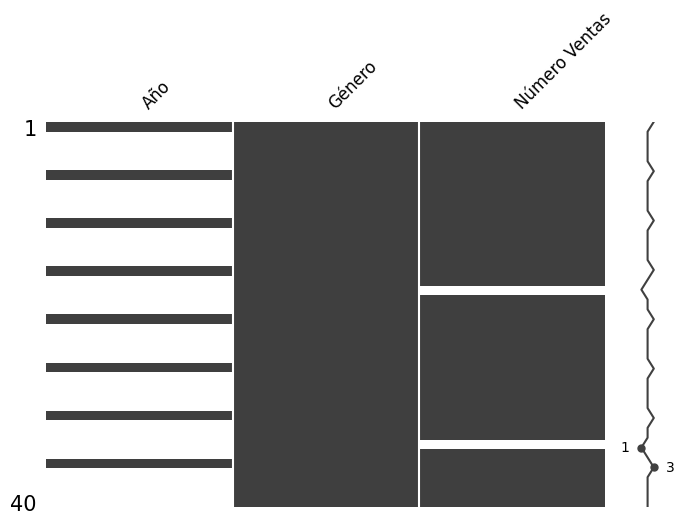

In [59]:
msno.matrix(df,figsize=(8,5), fontsize=12) #en blanco, cada missing value

<Axes: >

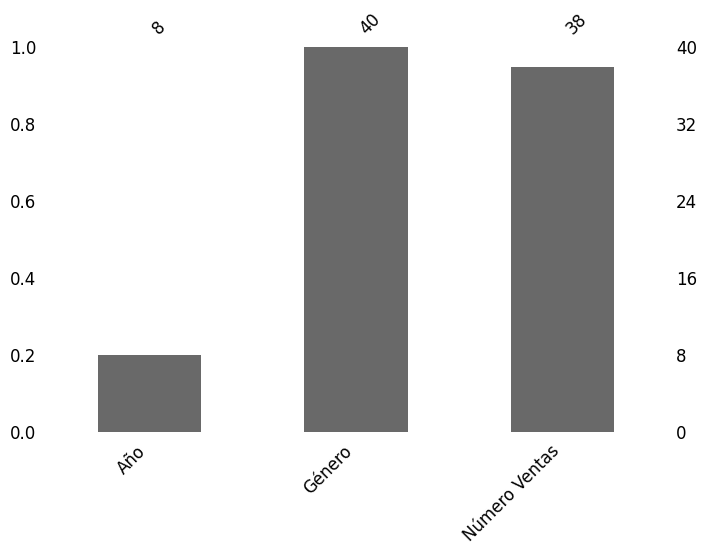

In [60]:
msno.bar(df, figsize=(8,5), fontsize=12)

Finalmente, si quieres ver el número total de Missing Values que hay repartidos por todo tu dataset...

In [61]:
df.isnull().sum().sum() 
#la primera expresión sum() suma a lo largo de cada columna y como lo que 
#obtenemos es una pd.Series, al aplicar el segundo sum() vuelve a sumar sobre la columna
#que contiene el número total de missing values por columna representando, ahora sí,
#el número total de missing values del dataset.

34

## Empecemos a rellenar missing Values

Analizando un poco el dataset, vemos que se trata de un conjunto de datos donde la columna *Año* solo indica el valor al lado del primer género.
Existe un método habitualmente utilizado y que no se suele mencionar como una estrategia disponible, pero que en este caso es realmente útil: `.ffill()`

In [62]:
df["Año"] = df["Año"].ffill() #de manera análoga también existe el método .bfill()

In [63]:
df.head(8)

,Año,Género,Número Ventas
0,2014.0,Aventuras,400.0
1,2014.0,Bélico,80.0
2,2014.0,Biografías,200.0
3,2014.0,Novela Romántica,350.0
4,2014.0,Poesía,80.0
5,2015.0,Aventuras,500.0
6,2015.0,Bélico,150.0
7,2015.0,Biografías,200.0


Como puedes apreciar, hasta que no encuentra otro valor rellena todas las filas hacia adelante con el primer valor encontrado.

In [64]:
df.isnull().sum() 

Año              0
Género           0
Número Ventas    2
dtype: int64

En estos momentos nos quedan dos Missings. ¿Cómo podemos localizarlos y únicamente ver los registros que corresponden a las observaciones que contienen valores missing en el campo *Número Ventas*?

Utilizando la máscara *booleana* que se crea con el método `pd.isnull()`

In [65]:
df[pd.isnull(df["Número Ventas"])]

,Año,Género,Número Ventas
17,2017.0,Biografías,NaN
33,2020.0,Novela Romántica,NaN


Vemos que, por el motivo que fuera, no hay dato para el género de Biografías en 2017 y tampoco para el género Novela Romántica en 2020.

En este momento, podríamos ver alguna medida estadística que nos de información sobre la columna *Número Ventas*.

In [66]:
df["Número Ventas"].describe()

count      38.000000
mean      305.657895
std       237.964826
min        80.000000
25%       150.000000
50%       200.000000
75%       350.000000
max      1000.000000
Name: Número Ventas, dtype: float64

Ahora podríamos asumir la media como un valor para rellenar los valores faltantes y ya tendríamos todos nuestro set de datos completo.

In [67]:
#Voy a hacer una copia del dataset solo para ver cómo aplicamos esa estrategia.
df_estrategia = df.copy()
df_estrategia["Número Ventas"] = df_estrategia["Número Ventas"].fillna(df_estrategia["Número Ventas"].mean())

In [68]:
df_estrategia.isnull().sum() 

Año              0
Género           0
Número Ventas    0
dtype: int64

En lugar de la **media**, podríamos haber imputado la **mediana** (que siempre es más conservadora) o **un valor aleatorio escogido entre el mínimo de libros vendidos y el máximo**. En fin, muchas estragias diferentes con las que ya tendríamos un dataset completo y sin valores faltantes. 

No obstante, en este caso, **podemos aprovecharnos del contexto que rodea a los datos** para imputar los valores faltantes, yendo por dos caminos diferentes:

- Podemos utilizar algún método de imputación teniendo en cuenta el número de ventas pero por Género
- Podemos ver qué sucede cada año y tomar una decisión.

Voy a coger el dataset original y voy a analizar cuántos libros se han vendido cada año (Sin tener en cuenta el género)

In [69]:
for anio in df["Año"].unique():
    n_ventas = df[df["Año"] == anio]["Número Ventas"].sum()
    print(f"El número total de libros vendidos en {anio} es: {n_ventas}")

El número total de libros vendidos en 2014.0 es: 1110.0
El número total de libros vendidos en 2015.0 es: 1270.0
El número total de libros vendidos en 2016.0 es: 1550.0
El número total de libros vendidos en 2017.0 es: 1350.0
El número total de libros vendidos en 2018.0 es: 1445.0
El número total de libros vendidos en 2019.0 es: 940.0
El número total de libros vendidos en 2020.0 es: 2150.0
El número total de libros vendidos en 2021.0 es: 1800.0


A través del análisis anterior lo que vemos es que, en 2020 (año de de confinamiento), se vendieron más libros que el resto de años. Pero no obtenemos mucha más información.

In [70]:
n_min = df[df["Año"] == 2020]["Número Ventas"].min()
n_max = df[df["Año"] == 2020]["Número Ventas"].max()    
print(f"\t El número mínimo: {n_min}")
print(f"\t El número máximo: {n_max}")
print(df[(df["Año"] == 2020) & (df["Número Ventas"] == 350)])
print(df[(df["Año"] == 2020) & (df["Número Ventas"] == 1000)])

	 El número mínimo: 350.0
	 El número máximo: 1000.0
       Año      Género  Número Ventas
32  2020.0  Biografías          350.0
       Año     Género  Número Ventas
30  2020.0  Aventuras         1000.0


Además, si vemos el valor mínimo y el valor máximo de números vendidos para 2020, vemos que hay bastante diferencia.

Veamos si podemos hacer algo teniendo en cuenta el número de libros vendidos por año y género:

In [71]:
generos = ["Biografías", "Novela Romántica"]
for genero in generos: 
    print(f"El número total de libros vendidos para el género {genero} es:")
    for anio in df["Año"].unique():
        n_ventas = df[(df["Año"] == anio) & (df["Género"] == genero)]["Número Ventas"].sum()
        print(f"\tEn {anio} : {n_ventas}")
    print(f"La media de libros de {genero} vendidos por año es: " , df[df["Género"] == genero]["Número Ventas"].mean());
    print(f"La mediana de libros de {genero} vendidos por año es: " , df[df["Género"] == genero]["Número Ventas"].median());
    print("*"*20)
    print()

El número total de libros vendidos para el género Biografías es:
	En 2014.0 : 200.0
	En 2015.0 : 200.0
	En 2016.0 : 200.0
	En 2017.0 : 0.0
	En 2018.0 : 190.0
	En 2019.0 : 300.0
	En 2020.0 : 350.0
	En 2021.0 : 250.0
La media de libros de Biografías vendidos por año es:  241.42857142857142
La mediana de libros de Biografías vendidos por año es:  200.0
********************

El número total de libros vendidos para el género Novela Romántica es:
	En 2014.0 : 350.0
	En 2015.0 : 300.0
	En 2016.0 : 300.0
	En 2017.0 : 350.0
	En 2018.0 : 100.0
	En 2019.0 : 120.0
	En 2020.0 : 0.0
	En 2021.0 : 200.0
La media de libros de Novela Romántica vendidos por año es:  245.71428571428572
La mediana de libros de Novela Romántica vendidos por año es:  300.0
********************



En este caso no encuentro un criterio claro para imputar en ningún caso.
Por buscar algún razonamiento, imputaremos la mediana para los libros de Biografías ya que en 2018 baja el número de ventas.

🛑 **¡Un momento! Me acaba de llamar José, el responsable de la tienda, diciéndome que antes de perder los datos para el número de libros vendidos del género de Novela Romántica, recuerda que en 2020 se vendieron 310 Novelas Románticas.**

¡Bueno!¡Pues algo es algo! Imputemos ambos valores.

In [72]:
condicion = (pd.isnull(df["Número Ventas"])) & (df["Género"]=="Biografías")

df.loc[condicion, "Número Ventas" ] = df[df["Género"] == "Biografías"]["Número Ventas"].median()

In [73]:
#como ya solo queda un missing utilizaré el método fillna, solo para que
#veas casos donde no me apetece "comerme la cabeza" filtrando el dataset
#y aprovecho lo que sé que hace cada método a mi favor.

df["Número Ventas"] = df["Número Ventas"].fillna(310)

In [74]:
df.isnull().sum()

Año              0
Género           0
Número Ventas    0
dtype: int64

**¡Reto conseguido!** En este punto ya tendríamos un dataset preparado para el análisis.

# Ejemplo 2

> Este dataset contiene información personal de personas ficticias como el nombre, apellidos, edad, estado civil o si se ha vacunado o no.

In [75]:
#leemos el dataset

ruta_dataset = "dataset_notebook_demo.xlsx"
df2 = pd.read_excel(ruta_dataset, na_values=treat_NaNs, sheet_name="ej2")

In [76]:
df2.shape #miramos su forma

(69, 12)

Podemos utilizar la siguiente expresión para simplemente saber si tenemos valores faltantes en cada columna.
Es otro recurso que puedes utilizar. Dependiendo de lo que en el momento te venga a la cabeza o te apetezca aplicar.

Permíteme anticiparme y comentarte que el método `df.isnull().sum()` será tu gran aliado en la mayoría de ocasiones.

In [77]:
df2.isna().any() #todas las columnas tienen al menos un NaN. Mala suerte XD!

Nombre          True
Apellido 1      True
Apellido 2      True
Sexo            True
Municipio       True
Provincia       True
NIF             True
Edad            True
Hijos           True
Ingresos        True
Estado Civil    True
Vacunadx        True
dtype: bool

In [78]:
missing_percentage(df2) #reutilizamos la función del primer ejemplo para
#sacar el porcentaje de missings por columna

,percent_missing (%)
Nombre,1.45
Apellido 1,8.70
Apellido 2,5.80
Sexo,10.14
Municipio,10.14
Provincia,8.70
NIF,66.67
Edad,5.80
Hijos,8.70
Ingresos,11.59


Observamos que la columna del NIF contiene un alto porcentaje de valores faltantes. 

Dado que no hemos definido ningún objetivo de análisis para este conjunto de datos y puesto que nuestra meta principal es aprender a tratar los valores faltantes, eliminaremos esta columna utilizando el método `.drop()`

In [79]:
df2 = df2.drop(columns=["NIF"])

En estos momentos voy a hacer una copia del dataset `df2` que llamaré `df2Copia` y que utilizaremos más adelante.

In [80]:
df2Copia = df2.copy()

In [81]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Nombre        68 non-null     object 
 1   Apellido 1    63 non-null     object 
 2   Apellido 2    65 non-null     object 
 3   Sexo          62 non-null     object 
 4   Municipio     62 non-null     object 
 5   Provincia     63 non-null     object 
 6   Edad          65 non-null     float64
 7   Hijos         63 non-null     object 
 8   Ingresos      61 non-null     float64
 9   Estado Civil  64 non-null     object 
 10  Vacunadx      65 non-null     object 
dtypes: float64(2), object(9)
memory usage: 6.1+ KB


Vamos a construir una función que analice de manera rápida (no muy estética, pero práctica) cuáles son las proporciones de las columnas categóricas:

In [82]:
def proporciones(data):
    columns = ["Sexo", "Hijos","Estado Civil", "Vacunadx"]
    for col in columns:
        print(f"La columna {col} tiene las siguientes proporciones: ")
        print(dict(round(data[col].value_counts(normalize=True)*100,2)))

In [83]:
proporciones(df2)

La columna Sexo tiene las siguientes proporciones: 
{'H': 50.0, 'M': 50.0}
La columna Hijos tiene las siguientes proporciones: 
{'NO': 58.73, 'SÍ': 41.27}
La columna Estado Civil tiene las siguientes proporciones: 
{'Solter/x': 65.62, 'Casad/x': 20.31, 'Divorciad/x': 14.06}
La columna Vacunadx tiene las siguientes proporciones: 
{'No': 64.62, 'SI': 35.38}


> **Atención**❗ : Más tarde haremos referencia a estas proporciones obtenidas, con el dataset `df2Copia`

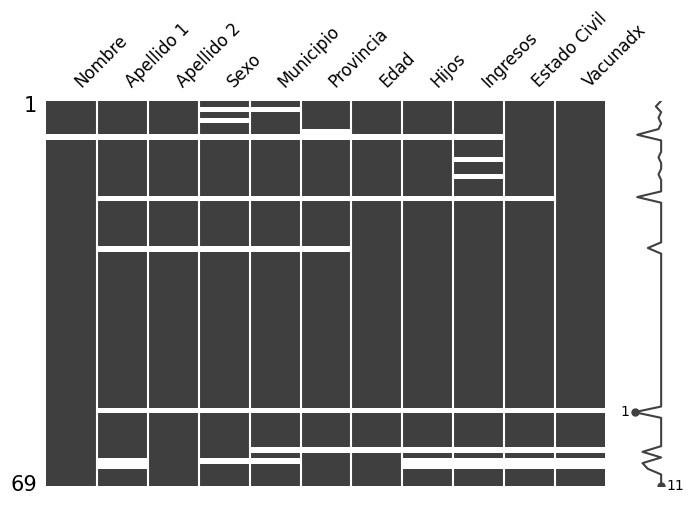

In [84]:
msno.matrix(df2,figsize=(8,5), fontsize=12); #en blanco, cada missing value

Vemos que tenemos algunas filas con valores faltantes.

Consideraremos que si un registro no contiene sus dos apellidos no es un registro válido.

In [85]:
df2 = df2[(pd.notnull(df2["Apellido 1"])) & (pd.notnull(df2["Apellido 2"]))]

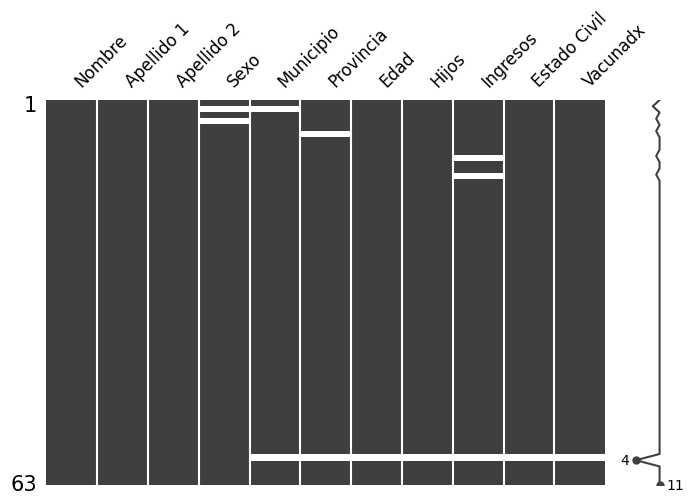

In [86]:
msno.matrix(df2,figsize=(8,5), fontsize=12); #en blanco, cada missing value

Filtremos nuestros datos para ver qué pinta tienen las filas que al menos contienen un valor faltante:

In [87]:
df2[df2.isnull().any(axis="columns")]

,Nombre,Apellido 1,Apellido 2,Sexo,Municipio,Provincia,Edad,Hijos,Ingresos,Estado Civil,Vacunadx
1,Ana Belén,Carrasco,Dimitrova,NaN,NaN,Zaragoza,22.0,NO,1000.0,Solter/x,SI
3,María,Gallego,Martínez,NaN,Sevilla,Sevilla,45.0,NO,1500.0,Solter/x,No
5,Manuel,García,Muñoz,H,Madrid,NaN,59.0,SÍ,1825.0,Divorciad/x,No
10,Juan,Sanz,Hernández,H,Rentería,Guipúzcoa,22.0,SÍ,NaN,Solter/x,SI
13,José Luis,Romero,Busto,H,San Sebastián,Guipúzcoa,45.0,SÍ,NaN,Solter/x,No
62,María Carmen,Romano,Abellán,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Dado que la columna Sexo contiene 2 NaN:

In [88]:
df2["Sexo"].isnull().sum()

2

In [89]:
print(df2[df2['Sexo'].isnull()])

      Nombre Apellido 1 Apellido 2 Sexo Municipio Provincia  Edad Hijos  \
1  Ana Belén   Carrasco  Dimitrova  NaN       NaN  Zaragoza  22.0    NO   
3      María    Gallego   Martínez  NaN   Sevilla   Sevilla  45.0    NO   

   Ingresos Estado Civil Vacunadx  
1    1000.0     Solter/x       SI  
3    1500.0     Solter/x       No  


Y analizando los datos asumimos que Ana Belén y María son de género Femenino, imputaremos la categoría "M" en la columna Sexo sin necesidad de hacerlo seleccionando los índices. Para ello, utilizaremos en esta ocasión el método `.fillna(<valor>)`

In [90]:
df2["Sexo"] = df2["Sexo"].fillna("M")

Otro registro que podemos eliminar por completo es el que tiene índice 62 por contar con demasiados Missing Values. Asumiremos ese riesgo! 😋

La siguiente operación funcionará porque pandas no pierde el índice hasta que no lo reseteemos nosotrxs.

In [91]:
df2 = df2.drop(62)

Para poder disponer del registro 1 (Ana Belén Carrasco) imputaremos Zaragoza al municipio.

De forma análoga, para disponer del registro 5 (Manuel García) imputaremos Madrid a la provincia (Madrid = CC.AA. uniprovincial)

In [92]:
df2.loc[1,"Municipio"] = "Zaragoza"
df2.loc[5,"Provincia"] = "Madrid"

Nos queda trabajar con los valores faltantes correspondientes a ingresos:

In [93]:
df2[df2.isnull().any(axis="columns")]

,Nombre,Apellido 1,Apellido 2,Sexo,Municipio,Provincia,Edad,Hijos,Ingresos,Estado Civil,Vacunadx
10,Juan,Sanz,Hernández,H,Rentería,Guipúzcoa,22.0,SÍ,NaN,Solter/x,SI
13,José Luis,Romero,Busto,H,San Sebastián,Guipúzcoa,45.0,SÍ,NaN,Solter/x,No


En este caso imputaremos el valor más habitual de Ingresos para las personas de 22 años.

In [94]:
#extremos la moda de los ingresos de todos los registros donde la persona tenga 22 años
val = df2[df2["Edad"]==22]["Ingresos"].mode()[0]
print(f"El valor más frecuente de ingresos para una persona de 22 años es: {val}")

#imputamos ese valor al registro 10.
df2.loc[10,"Ingresos"] = val

El valor más frecuente de ingresos para una persona de 22 años es: 1000.0


Finalmente, para la persona de 45 años imputaremos la mediana en su rango de edad.

In [95]:
#extremos la mediana de los ingresos de todos los registros donde la persona tenga 45 años
val = df2[df2["Edad"]==45]["Ingresos"].median()
print(f"El valor más frecuente de ingresos para una persona de 45 años es: {val}")

#imputamos ese valor al registro 13.
df2.loc[13,"Ingresos"] = val

El valor más frecuente de ingresos para una persona de 45 años es: 1500.0


En estos momentos ya dispondríamos de un dataset apto para el análisis y modelado.

In [96]:
df2.isnull().sum()

Nombre          0
Apellido 1      0
Apellido 2      0
Sexo            0
Municipio       0
Provincia       0
Edad            0
Hijos           0
Ingresos        0
Estado Civil    0
Vacunadx        0
dtype: int64

Recuperando la copia del dataset `df2` llamada `df2Copia` como dataset de referencia ahora, también podríamos haber optado por eliminar todas las filas que contengan algún valor nulo con el método `.dropna(axis=1)`
- `df.dropna(axis="index")` elimina todas las filas que tengan como mínimo un missing value

Para las columnas:
- `df.dropna(axis="columns")` elimina todas las columnas que tengan como mínimo un missing value


In [97]:
df2Copia = df2Copia.dropna(axis="index")
df2Copia.isnull().sum()

Nombre          0
Apellido 1      0
Apellido 2      0
Sexo            0
Municipio       0
Provincia       0
Edad            0
Hijos           0
Ingresos        0
Estado Civil    0
Vacunadx        0
dtype: int64

Podemos analizar si para las columnas categóricas, el hecho de haber eliminado las filas sin ton ni son afecta a las proporciones de las mismas:

In [98]:
proporciones(df2Copia)

La columna Sexo tiene las siguientes proporciones: 
{'M': 52.63, 'H': 47.37}
La columna Hijos tiene las siguientes proporciones: 
{'NO': 59.65, 'SÍ': 40.35}
La columna Estado Civil tiene las siguientes proporciones: 
{'Solter/x': 64.91, 'Casad/x': 22.81, 'Divorciad/x': 12.28}
La columna Vacunadx tiene las siguientes proporciones: 
{'No': 63.16, 'SI': 36.84}


Si comparamos con las proporciones originales, vemos que en ocasiones podemos sacrificar unos cuantos registros para ganar tiempo, sin que ello perjudique gravemente la muestra de datos con la que contamos para el análisis/entrenamiento del modelo.

<div style="background-color: #FFCB92; 
                margin:10px;padding:20px;
                color:black;
                font-weight:bold;
                font-size:30px;
                border-left: 9px solid #759a81;">Bonus!</div>

También me gustaría dejarte por aquí algunas otras píldoras que pueden servirte de gran ayuda.


<div style="background-color: coral;
            color:white;
            padding:20px;
            font-weight:bold;">1- Puedes hacer que pandas interprete los valores infinitos `np.inf` como `np.nan`</div>

In [99]:
pd.set_option('use_inf_as_na', True)

C:\Users\endik\AppData\Local\Temp\ipykernel_18776\1969650772.py:1: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  pd.set_option('use_inf_as_na', True)


In [100]:
import numpy as np
#coloco a propósito un valor infinito en la primera celda del campo Género.

df.iloc[0,1] = np.inf 
df.head(2) #como puedes ver lo interpreta como NaN

,Año,Género,Número Ventas
0,2014.0,NaN,400.0
1,2014.0,Bélico,80.0



<div style="background-color: coral;
            color:white;
            padding:20px;
            font-weight:bold;">2- También puedes utilizar la función .replace() para reemplazar un valor cualquiera (también un missing value) por el valor que desees.</div>

In [101]:
df["Género"] = df["Género"].replace(np.nan,"Aventuras") #vuelvo a restaurar el missing

In [102]:
df.head(2)

,Año,Género,Número Ventas
0,2014.0,Aventuras,400.0
1,2014.0,Bélico,80.0



<div style="background-color: coral;
            color:white;
            padding:20px;
            font-weight:bold;">3- Pandas cuenta con la opción .interpolate() para rellenar los missings que hay entre dos puntos utilizando diferentes estrategias:
    <ul style="color: rgb(255, 255, 255);">
    <li>Lineal</li>
    <li>Cúbica</li>
    <li>Cuadrática</li>
    <li>etc.</li>

</ul>
</div>

<a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.interpolate.html">Te dejo por aquí la docu de pandas</a>


In [103]:
ruta_dataset = "dataset_notebook_demo.xlsx"
df3 = pd.read_excel(ruta_dataset, na_values=treat_NaNs, sheet_name="ejinterpolacion")

<Axes: title={'center': 'La señal perfecta deseada.'}, xlabel='fecha'>

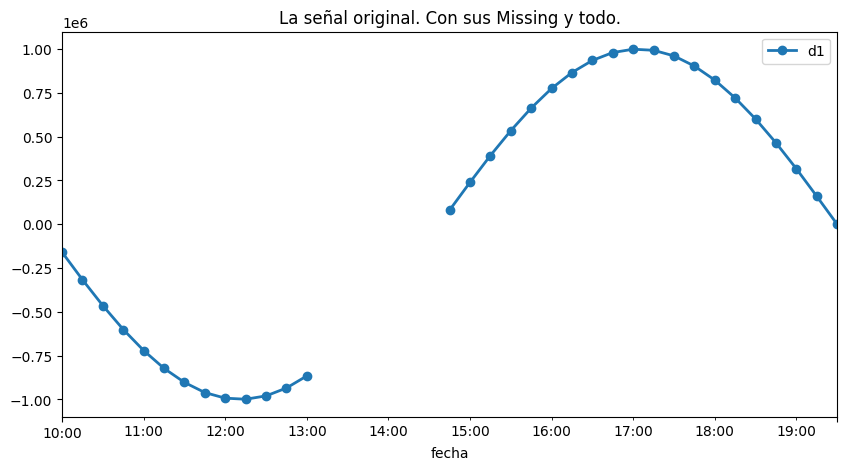

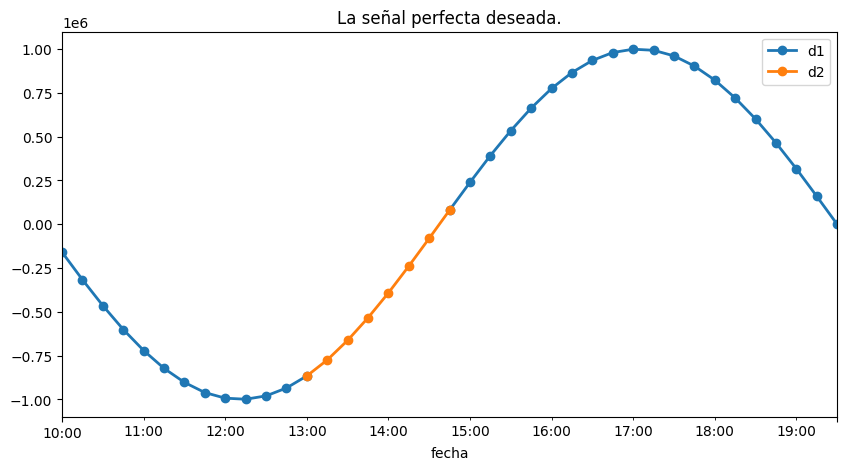

In [104]:
df3.index = df3.fecha #colocamos la fecha como índice y eliminamos dicha columna
df3[["d1"]].plot(marker='o', figsize=(10,5), linewidth=2, title="La señal original. Con sus Missing y todo.")
df3[["d1","d2"]].plot(marker='o', figsize=(10,5), linewidth=2, title="La señal perfecta deseada.")

¿Pero, y si interpolamos linealmente...**nos perdemos mucho**?

<Axes: title={'center': 'Señal interpolada vs. Señal esperada.'}, xlabel='fecha'>

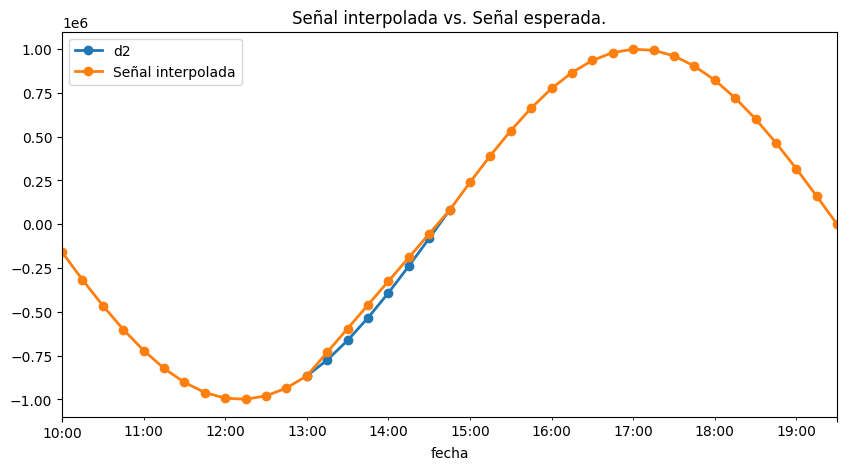

In [105]:
df3["Señal interpolada"] = df3["d1"].interpolate("linear")
df3[["d2","Señal interpolada"]].plot(marker='o', figsize=(10,5), linewidth=2,title="Señal interpolada vs. Señal esperada.")

Como te comentaba en anteriores ocasiones, dependerá del caso. Pero a veces las estrategias más simples son suficientes como para permitirnos continuar con nuestra labor.


<div style="background-color: coral;
            color:white;
            padding:20px;
            font-weight:bold;">4- utilizar las componentes de estacionalidad y tendencia en una serie temporal con Missing Values para interpolar y reemplazar los valores faltantes.
</div>

> 🔵 Puedes volver aquí cuando quieras, si aún no tienes los conocimientos sobre Time Series.

🔵 El conjunto de datos AirPassengers proporciona el recuento mensual de los pasajeros de una aerolínea estadounidense, desde 1949 hasta 1960.

In [106]:
ruta_dataset = "dataset_notebook_demo.xlsx"
df4 = pd.read_excel(ruta_dataset, na_values=treat_NaNs, sheet_name="ejAirPassengers")

In [107]:
from statsmodels.tsa.seasonal import seasonal_decompose

df4["Month"] = pd.to_datetime(df4["Month"]) #convertimos a tipo fecha la variable Month.
df4.set_index('Month', inplace=True) #la colocamos como índice del dataset.
index = df4[pd.isnull(df4["#Passengers"])].index #creamos una máscara con los índices donde #Passengers es null.
#para poder detectar la estacionalidad de la serie y la tendencia tomamos la decisión
#de interpolar linealmente la serie temporal.
df4['#Passengers1']= df4['#Passengers'].interpolate()

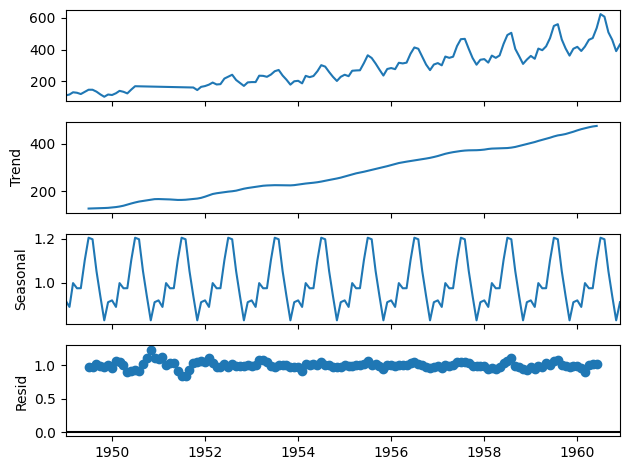

In [108]:
analysis = df4[['#Passengers1']].copy()

#descomponemos la serie en tendencia, estacionalidad y residuo
decompose_result_mult = seasonal_decompose(analysis, model="multiplicative")

trend = decompose_result_mult.trend
seasonal = decompose_result_mult.seasonal
residual = decompose_result_mult.resid

decompose_result_mult.plot();

In [109]:
#dado que tenemos delante una serie temporal con tendencia ascendente
#y una estacionalidad marcada, podemos interpolar de la siguiente manera:
df4.loc[index, "#Passengers"] = trend.loc[index]*seasonal.loc[index]

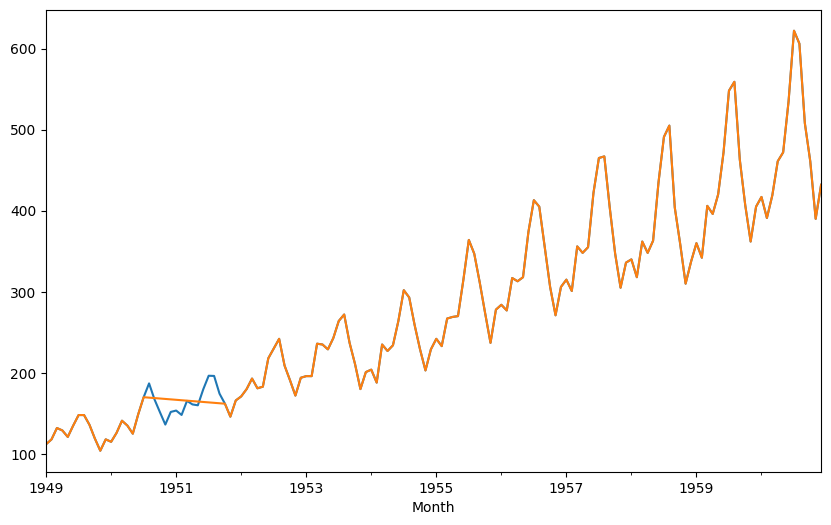

In [110]:
df4["#Passengers"].plot(figsize = (10,6)); #Señal ajustada
df4["#Passengers1"].plot(figsize = (10,6)); #Señal interpolada linealmente

Nada mal, ¿Verdad?😊


<div style="background-color: coral;
            color:white;
            padding:20px;
            font-weight:bold;">5- No te ciñas a pandas y explora otros métodos de imputación pertenecientes a otras librerías como scikit-learn, fancyimpute, miceforest,etc.)</div>
            
Te dejo un par de enlaces que considero que explican bastante bien la imputación múltiple iterativa e imputación KNN:
- <a href="https://www.youtube.com/watch?v=gG6rGj8d3pc">Imputación KNN</a>
- <a href="https://www.youtube.com/watch?v=h61DdCgov-g">Imputación Iterativa</a>


<div style="background-color:  #FFCB92;margin: 20px; padding: 20px">
<b>¡Hasta la próxima pequeñx gran Egger!</b> 🐣 Ya estás un pasito más cerca de lograr tus metas!
</div>